In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

#sklearn libraries
from sklearn.utils import resample
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score,KFold, GridSearchCV

from sklearn import preprocessing
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss,roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.externals import joblib
from sklearn.feature_selection import RFE,RFECV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB,ComplementNB
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Basic Information on Data

Attribute Information:
<br>
1) ID number
<br>
2) Diagnosis (M = malignant, B = benign) 3-32)
<br><br>
Ten real-valued features are computed for each cell nucleus:
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)


The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.
<br>Class distribution: 357 benign, 212 malignant


In [2]:
data = pd.read_csv("datasets_180_408_data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


There are 4 things that we take note of: 
* There is an id that cannot be used for classificaiton 
* Diagnosis is our class label 
* Unnamed: 32 feature includes NaN so we do not need it.
* The 30 columns are all corresponding to numerical variables, ie. other than Diagnosis we do not have any categorical variables

In [4]:
col = data.columns 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
y = data.diagnosis                          # M or B 
list_to_drop = ['Unnamed: 32','id','diagnosis']
x = data.drop(list_to_drop,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
colour = sns.color_palette(["#f5abdf","#ed32b5"])

Number of Benign:  357
Number of Malignant :  212


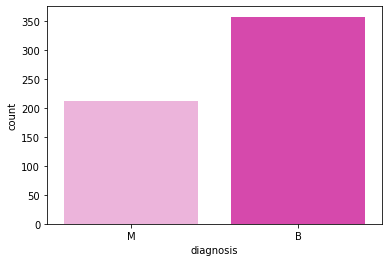

In [7]:
ax = sns.countplot(y,label="Count", palette=colour)       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [8]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The features can be grouped together based on the mean/standard error/worst that they correspond to. It is important to understand here that the standard error and worst are essentially just results of feature engineering on the primary 10 feature means

In [9]:
features_mean= list(x.columns[1:10])
features_se= list(data.columns[10:20])
features_worst=list(data.columns[20:30])

It is very difficult to draw any meaningful information from the above table and so we decide to plot it out

### Violin Plots
Violin plots allow us to effectively visualise the various distributions side by side

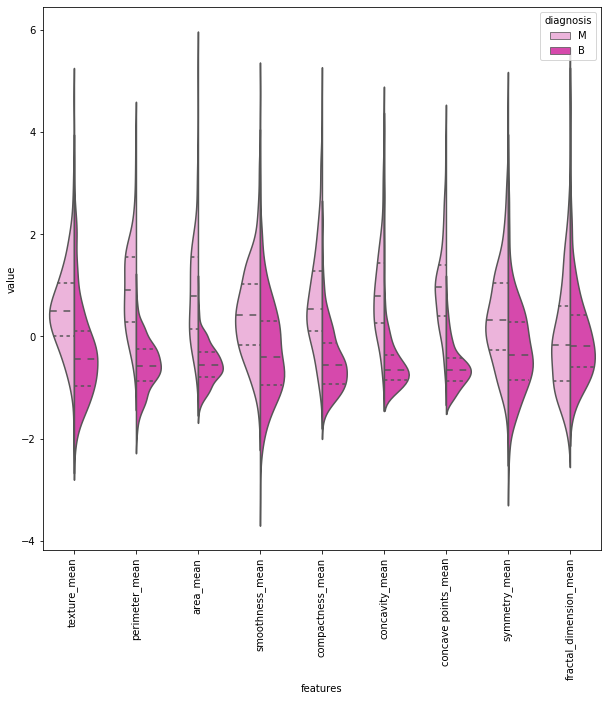

In [10]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2[features_mean]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart", palette=colour)
plt.xticks(rotation=90)
plt.show()

Lets interpret the plot above together. For example, in texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

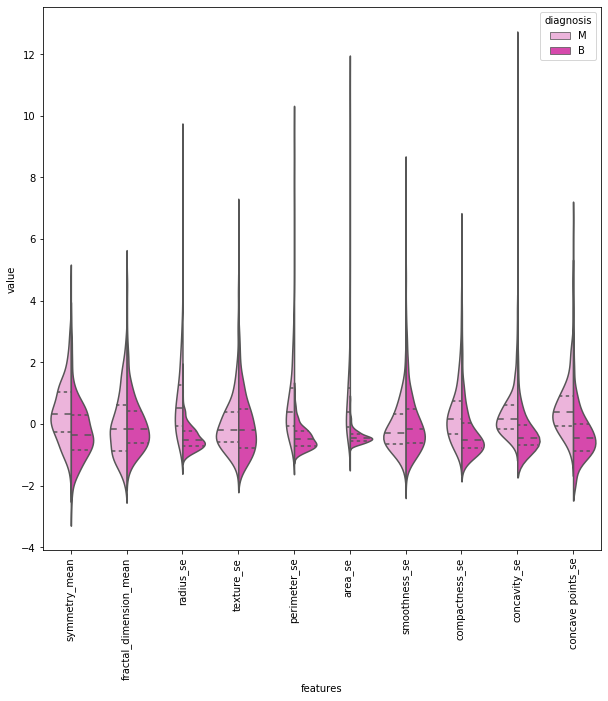

In [11]:
# Second ten features
data = pd.concat([y,data_n_2[features_se]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart", palette=colour)
plt.xticks(rotation=90)
plt.show()

If we observe the above plot carefully we realise that is is essentially just a compressed version of the violin plots for the corresponding feature means

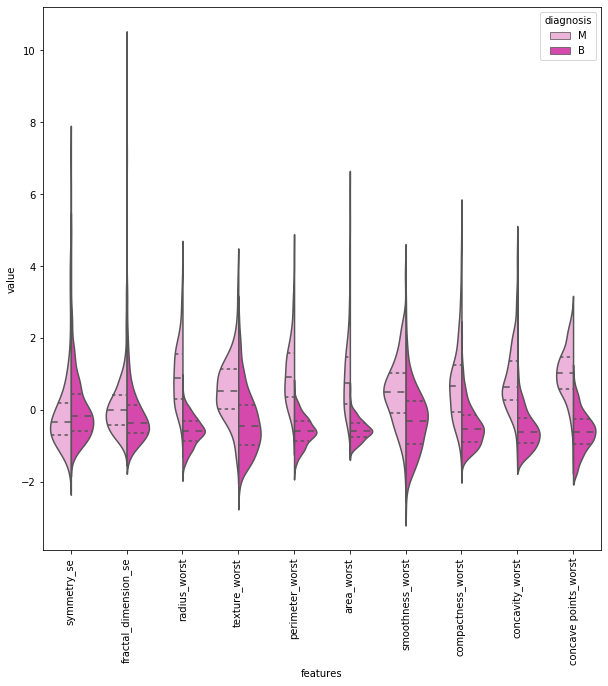

In [12]:
# Third ten features
data = pd.concat([y,data_n_2[features_worst]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart", palette=colour)
plt.xticks(rotation=90)
plt.show()

In [13]:
# plt.figure(figsize=(10,10))
# sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
# plt.xticks(rotation=90)
# plt.show()

In [14]:
# sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="regg", color="#ce1414")
# plt.show()

In [15]:
# sns.set(style="white")
# df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
# g = sns.PairGrid(df, diag_sharey=False)
# g.map_lower(sns.kdeplot, cmap="Blues_d")
# g.map_upper(plt.scatter)
# g.map_diag(sns.kdeplot, lw=3)
# plt.show()

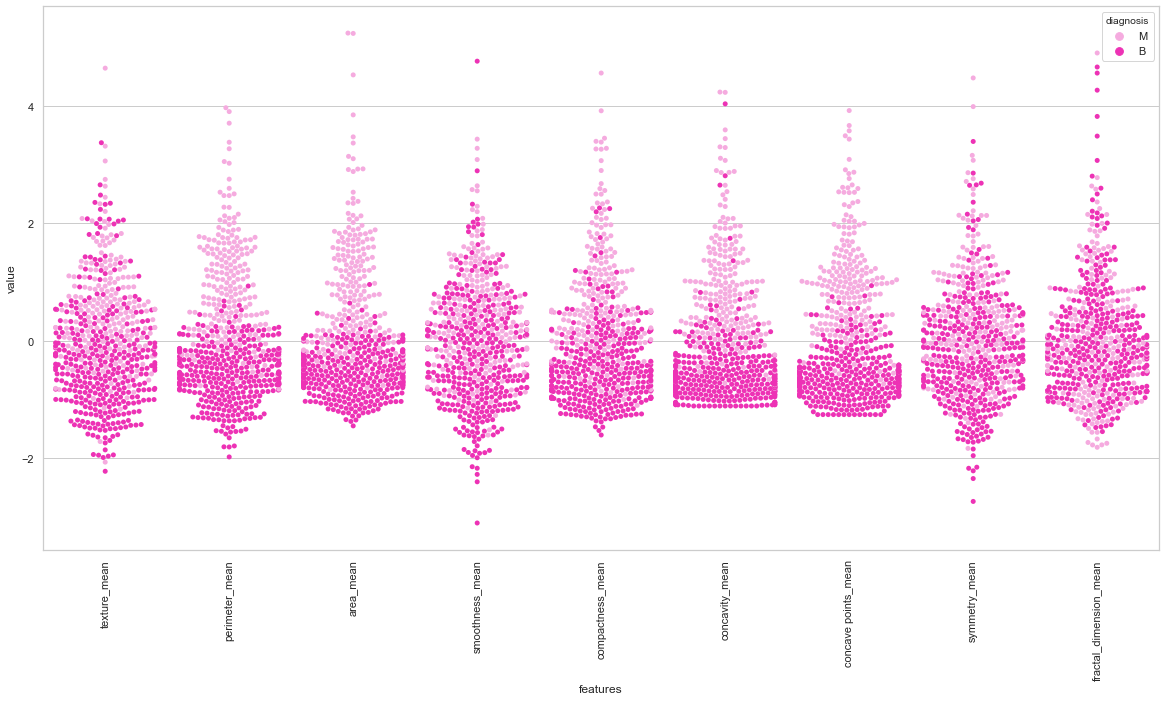

In [16]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2[features_mean]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, palette=colour)

plt.xticks(rotation=90)
plt.show()

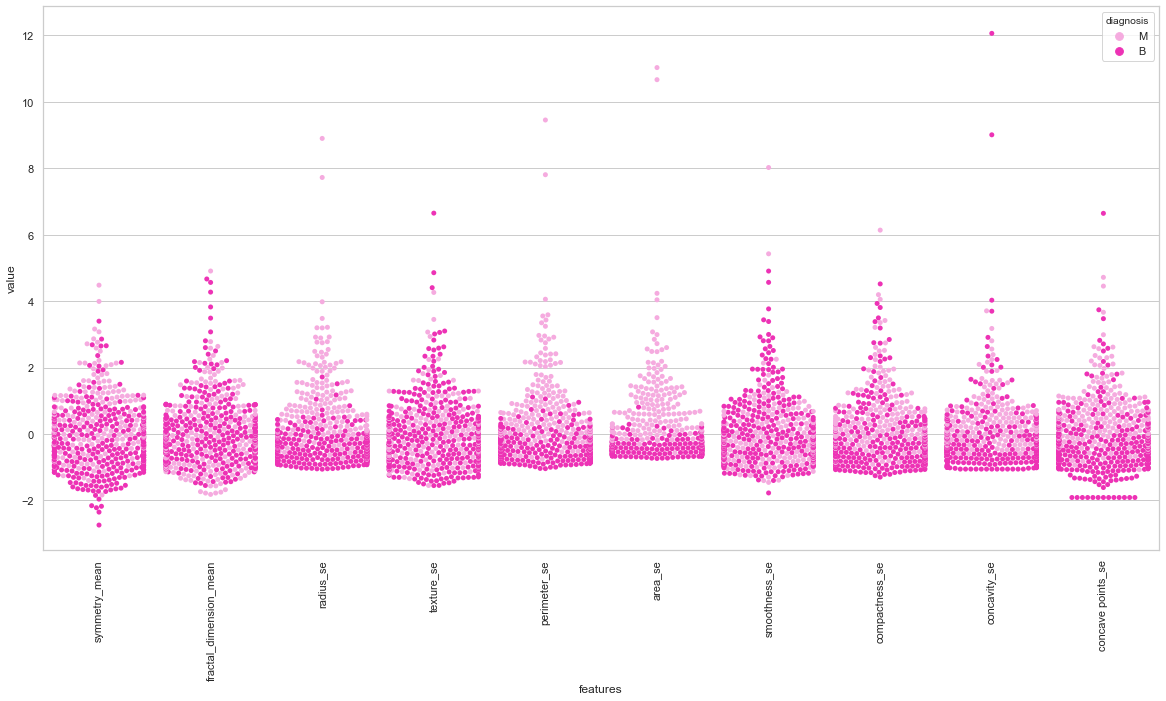

In [17]:
data = pd.concat([y,data_n_2[features_se]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data,palette=colour)
plt.xticks(rotation=90)
plt.show()

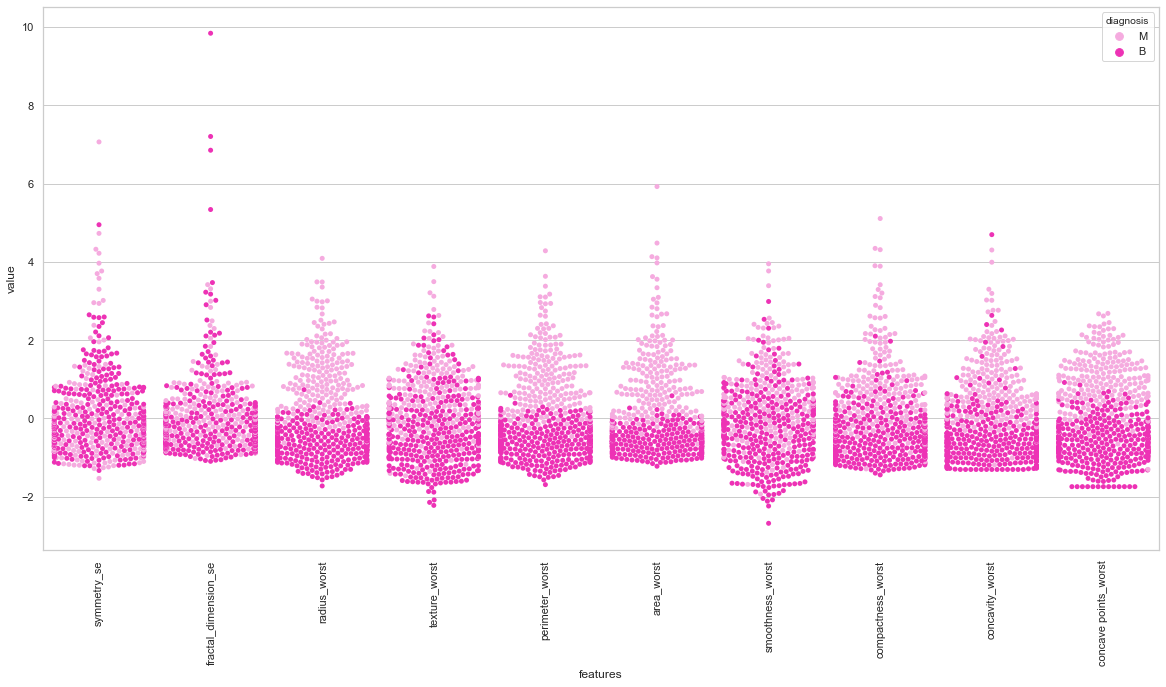

In [18]:
data = pd.concat([y,data_n_2[features_worst]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data,palette=colour)
plt.xticks(rotation=90)
plt.show()

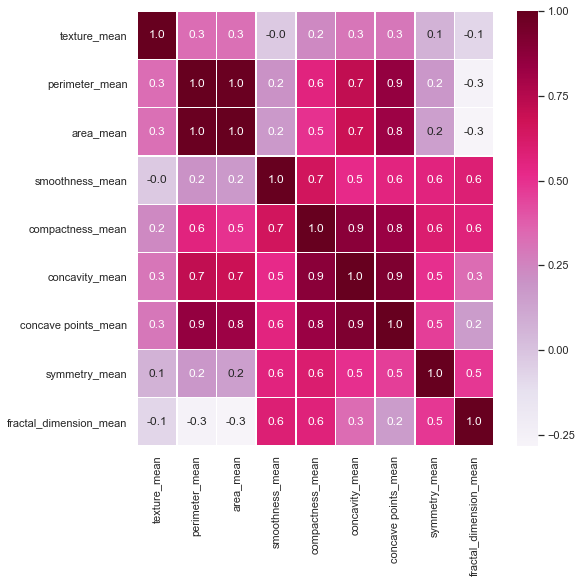

In [19]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(x[features_mean].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="PuRd")
plt.show()

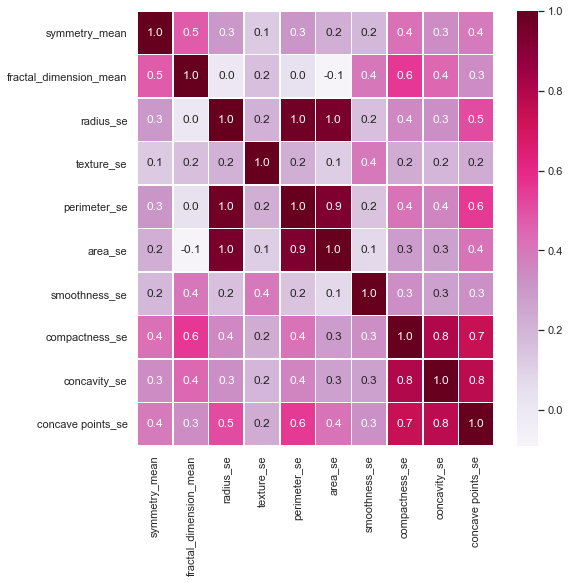

In [20]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(x[features_se].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="PuRd")
plt.show()

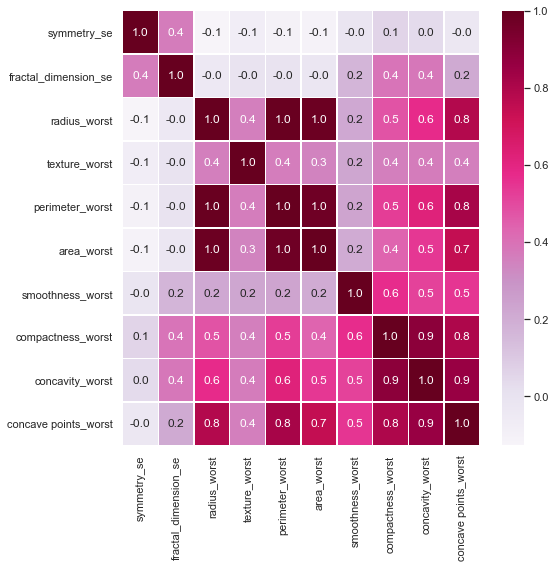

In [21]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(x[features_worst].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="PuRd")
plt.show()

### Feature Selection

**Importance of Feature Selection**

1. Reduces Overfitting: Less redundant data means less possibility of making decisions based on redundant data/noise.
2. Improves Accuracy: Less misleading data means modeling accuracy improves.
3. Reduces Training Time: Less data means that algorithms train faster.

**1) Feature Selection from correlation matrix**

As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other. We elect to use only the area_mean after looking at the violin plot and swarm plot of the corresponding features. We feel that it will help best delineate the two classes.

Compactness_mean, concavity_mean and concave points_mean are also strongly correlated with each other. We thus elect to use only concavity_mean. Apart from these, radius_se, perimeter_se and area_se are correlated and we use only use area_se. radius_worst, perimeter_worst and area_worst are correlated and we use use area_worst.

One can clearly see that thus far the features that we have dropped are linked by mathematical relations, ie. Raidus, Perimeter and Area have a clear link between them and should argubaly be perfeclty correlated to each other.

Compactness_worst, concavity_worst and concave points_worst so we use concavity_worst. Compactness_se, concavity_se and concave points_se so we use concavity_se. texture_mean and texture_worst are correlated and we use texture_mean. area_worst and area_mean are correlated, we use area_mean.

In [22]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_fs_selected = x.drop(drop_list1,axis = 1)        # do not modify x, we will use it later 
x_fs_selected.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features.

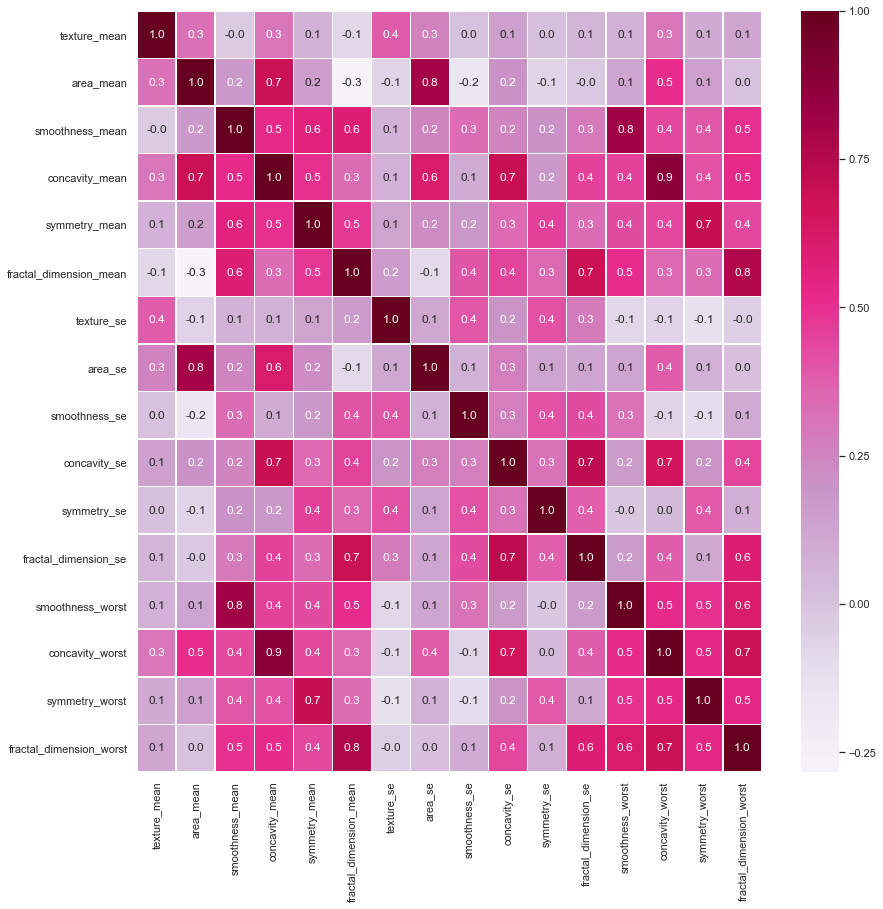

In [23]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_fs_selected.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="PuRd")
plt.show()

After removing the correlated columns we notice that only high degree of correlation remains between those columns which are obviously linked by feature engineering

In [24]:
# split data train 70 % and test 30 %
x_corr_train, x_corr_test, y_train, y_test = train_test_split(x_fs_selected, y, test_size=0.3, random_state=42)

**2) Univariate feature selection**

We use the SelectKBest function and chi2 as the evaluation metric (univariate statistical test). It can be seen as a preprocessing step to an estimator. We then select the 5 best features to be used from the dataset for our analysis. 

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
x_kbest_train = select_feature.transform(x_train)
x_kbest_test = select_feature.transform(x_test)

So now we get the top 5 features to sort by and we can check which those are below

In [26]:
#print('Score list:', select_feature.scores_)
#print('Feature list:', x_train.columns)
df = pd.DataFrame([select_feature.scores_, x_train.columns]).transpose()
df.columns = ["Score", "Feature"]
df.sort_values(by='Score',ascending=False).head()

,Score,Feature
23,75021.7,area_worst
3,36690,area_mean
13,6127.41,area_se
22,2405.13,perimeter_worst
2,1340.61,perimeter_mean


**3) Principal Component Analysis**

PCA is a method to project data in a higher dimensional space into a lower dimensional space by maximizing the variance of each dimension.

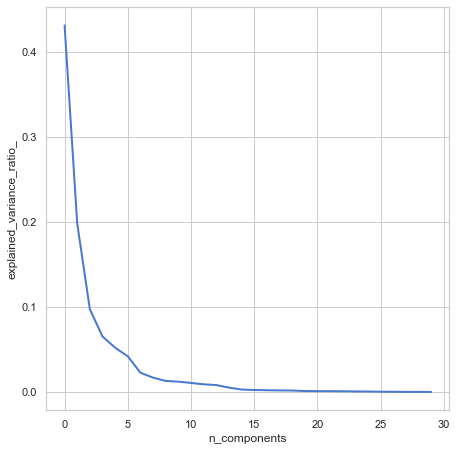

In [27]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.std())
x_test_N = (x_test-x_test.mean())/(x_test.std())
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(8, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.show()

We can use 5 components as that is where the elbow of explanation occurs. These 5 components explain about 85% of the variance in the data

In [28]:
pca = PCA(n_components=5)
#pca = PCA(0.95)
pca.fit(x_train_N)
pca.explained_variance_ratio_
#pca.n_components_

array([0.4316748 , 0.19845652, 0.09733159, 0.06531574, 0.05212151])

In [29]:
x_pca_train = pca.transform(x_train_N)
x_pca_test = pca.transform(x_test_N)

**Defining Helper Functions**

**Note for all confusion matrix and scores we encode malignant as 1 as we want to prioritise obtaining information about it**

In [30]:
def get_results(y_test, y_pred): 
    #roc=roc_auc_score(y_test, y_pred, average = 'weighted', pos_label="M")
    acc = balanced_accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    rec = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    f1 = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

    model_results = pd.DataFrame([[acc,prec,rec, f1]],
                   columns = ['Balanced Accuracy', 'Weighted Precision', 
                              'Weighted Recall', 'Weighted F1 Score'])
    
    return model_results

def make_confusion_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cm, annot = True, square = True, fmt = "d", cmap = 'RdPu')
    plt.title("Confusion Matrix", fontsize = 15) 
    plt.xlabel('predicted')
    plt.ylabel('target')
    plt.show()

In [31]:
store_of_results = []

**No Feature Selection Split**

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

We shall thus be testing out the various feature selection methods:
* x_corr_train, x_test_train
* x_kbest_train, x_kbest_test
* x_pca_train, x_pca_test
* Recursive Feature Elimination for each classifier (if possible)
* No feature selection

In [33]:
train_datasets = [x_train, x_corr_train, x_kbest_train, x_pca_train]
test_datasets = [x_test, x_corr_test, x_kbest_test, x_pca_test]
dataset_names = ["Standard", "Correlation Selection", "KBest", "PCA"]

### Predictive model : Logistic Regression

Logistic regression is another technique borrowed by machine learning from the field of statistics.
It is the go-to method for binary classification problems (problems with two class values).

Logistic regression uses an equation as the representation, very much like linear regression.
Input values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value.

In [34]:
model = LogisticRegression(solver = 'liblinear',
                           random_state = 42, class_weight = "balanced")

In [35]:
for i, m in enumerate(dataset_names):
    model.fit(train_datasets[i], y_train)
    y_pred = model.predict(test_datasets[i])
    df = get_results(y_test,y_pred)
    df["model"] = "Logistic Regression"
    df["dataset"] = m
    store_of_results.append(df)

We try recursive Feature Elimination and see what kind of results do we obtain

In [36]:
rfecv = RFECV(estimator=LogisticRegression(solver = 'liblinear', random_state = 42),
              step=1, cv=10, scoring='accuracy')
rfecv.fit(x_train, y_train)
print("Optimal number of features: %d" % rfecv.n_features_)

Optimal number of features: 26


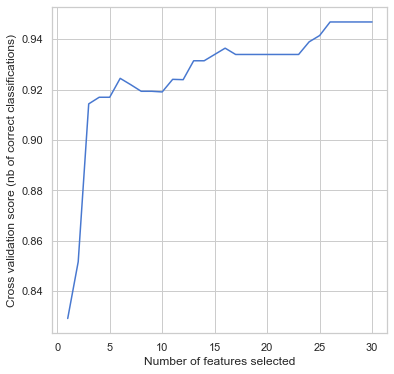

In [37]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(6,6))
plt.xlabel("Number of features selected", fontsize = 12)
plt.ylabel("Cross validation score (nb of correct classifications)", fontsize = 12)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

We see that with less than 5 features we already have 97% accuracy and beyond that is just extreme overfitting -- Consequently we elect not to inlcude the 26 feature result of RFECV

### Predictive model : Knn

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) — calculating the distance between points on a graph.

We first try to figure out the optimal Nearest Neighbour values to base our knn model on

In [38]:
knn7 = KNeighborsClassifier(n_neighbors = 7)
knn9 = KNeighborsClassifier(n_neighbors = 9)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn11 = KNeighborsClassifier(n_neighbors = 11)
knn17 = KNeighborsClassifier(n_neighbors = 17)
knn21 = KNeighborsClassifier(n_neighbors = 21)
list_of_model = [knn5, knn7, knn9, knn11, knn17, knn21]

knn_results = []
k = [5,7,9,11,17,21]
for i, model in enumerate(list_of_model):
    model.fit(train_datasets[1], y_train)
    y_pred = model.predict(test_datasets[1])
    df = get_results(y_test,y_pred)
    df["k"] = k[i]
    knn_results.append(df)
knn_res = pd.concat(knn_results)

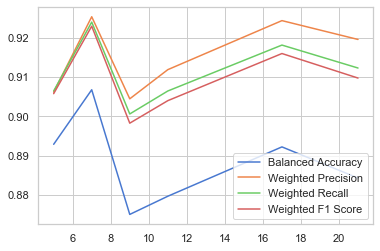

In [39]:
for i in range(4):
    plt.plot(knn_res["k"],knn_res.iloc[:,i])
plt.legend(knn_res.columns[:-1])
plt.show()

We see that we obtain the best results for knn when nearest neighbours is set to 7

In [40]:
model = KNeighborsClassifier(n_neighbors = 7)

In [41]:
for i, m in enumerate(dataset_names):
    model.fit(train_datasets[i], y_train)
    y_pred = model.predict(test_datasets[i])
    df = get_results(y_test,y_pred)
    df["model"] = "KNN-7"
    df["dataset"] = m
    store_of_results.append(df)

We cannot use RFECV here as KNN has a different approach to classifications and doesn't make explicit the importance of each feature

### Predictive model : Adaboost

AdaBoost is an ensemble learning method (also known as “meta-learning”) which was initially created to increase the efficiency of binary classifiers. AdaBoost uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones.

In [42]:
clf = AdaBoostClassifier(random_state=42)

In [43]:
for i, m in enumerate(dataset_names):
    clf.fit(train_datasets[i], y_train)
    y_pred = clf.predict(test_datasets[i])
    df = get_results(y_test,y_pred)
    df["model"] = "Adaboost"
    df["dataset"] = m
    store_of_results.append(df)

### Predictive model : SVM

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

In [44]:
svc_rbf = SVC(kernel='rbf', gamma='scale', class_weight='balanced')

In [45]:
for i, m in enumerate(dataset_names):
    svc_rbf.fit(train_datasets[i], y_train)
    y_pred = svc_rbf.predict(test_datasets[i])
    df = get_results(y_test,y_pred)
    df["model"] = "SVM"
    df["dataset"] = m
    store_of_results.append(df)

SVM doesn't have REFCV as well

### Predictive model : Naive Bayes

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [46]:
gnb = GaussianNB()

In [47]:
for i, m in enumerate(dataset_names):
    gnb.fit(train_datasets[i], y_train)
    y_pred = gnb.predict(test_datasets[i])
    df = get_results(y_test,y_pred)
    df["model"] = "Naive Bayes"
    df["dataset"] = m
    store_of_results.append(df)

We cannot use RFECV here as NB has a different approach to classifications and doesn't make explicit the importance of each feature

### Predictive model : Random Forest

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:

>A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

In [48]:
rf_model = RandomForestClassifier()

In [49]:
for i, m in enumerate(dataset_names):
    rf_model.fit(train_datasets[i], y_train)
    y_pred = rf_model.predict(test_datasets[i])
    df = get_results(y_test,y_pred)
    df["model"] = "Random Forest"
    df["dataset"] = m
    store_of_results.append(df)

In [50]:
rf = RandomForestClassifier() 
rfecv = RFECV(estimator=rf, step=1, cv=10,scoring='accuracy') 
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)

Optimal number of features : 19


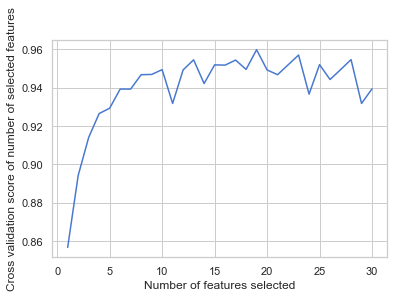

In [51]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

If we see the Random Forest results from the other feature selection methods we notice that we get better results than RFECV and thus we elect not to inlcude it

### Predictive Model : Descision Trees

Decision Tree models are created using 2 steps: Induction and Pruning. Induction is where we actually build the tree i.e set all of the hierarchical decision boundaries based on our data. Because of the nature of training decision trees they can be prone to major overfitting. Pruning is the process of removing the unnecessary structure from a decision tree, effectively reducing the complexity to combat overfitting with the added bonus of making it even easier to interpret.

In [52]:
model = DecisionTreeClassifier()

In [53]:
for i, m in enumerate(dataset_names):
    model.fit(train_datasets[i], y_train)
    y_pred = model.predict(test_datasets[i])
    df = get_results(y_test,y_pred)
    df["model"] = "Decision Trees"
    df["dataset"] = m
    store_of_results.append(df)

In [54]:
rfecv = RFECV(estimator=DecisionTreeClassifier(),
              step=1, cv=10, scoring='accuracy')
rfecv.fit(x_train, y_train)
print("Optimal number of features: %d" % rfecv.n_features_)

Optimal number of features: 4


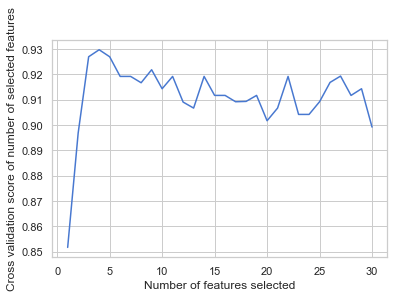

In [55]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Analysis of Results

In [56]:
df = pd.concat(store_of_results)
df.reset_index(inplace=True, drop=True)
df.iloc[df.groupby(by=["model"]).idxmax()["Weighted F1 Score"]]

,Balanced Accuracy,Weighted Precision,Weighted Recall,Weighted F1 Score,model,dataset
8,0.974868,0.976608,0.976608,0.976608,Adaboost,Standard
25,0.940476,0.942159,0.941520,0.941704,Decision Trees,Correlation Selection
4,0.958995,0.964954,0.964912,0.964790,KNN-7,Standard
3,0.987434,0.988304,0.988304,0.988304,Logistic Regression,PCA
18,0.939815,0.954755,0.953216,0.952679,Naive Bayes,KBest
23,0.957672,0.959266,0.959064,0.959130,Random Forest,PCA
15,0.974868,0.976608,0.976608,0.976608,SVM,PCA


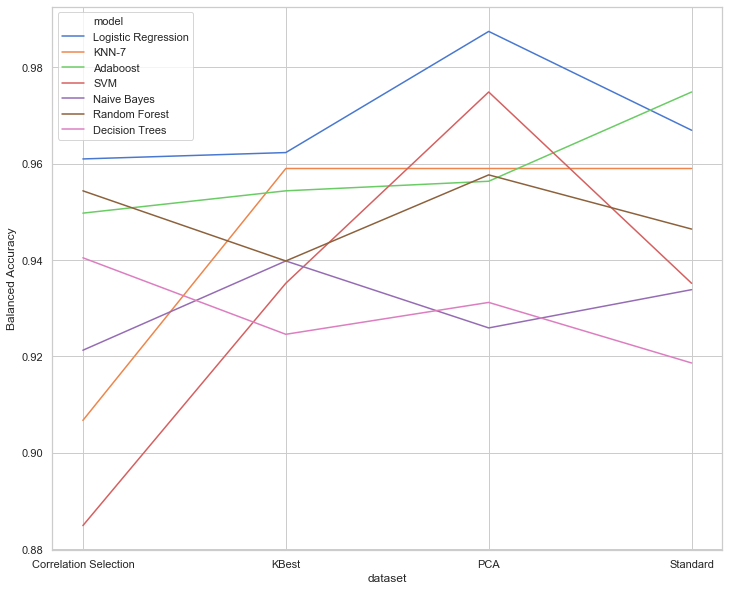

In [57]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.lineplot(y="Balanced Accuracy",x="dataset", hue="model",data=df, ax=ax)
plt.show()

We can clearly see that logistic regression is the best performing model across all datasets. Logistic REgression on the dataset obtained after PCA obtains accuracy/f1-score upwards of 0.98 and is our model and preprocessing method of choice